In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ladda datasetet
housing_data = pd.read_csv("housing.csv")
# Kontrollera datasetets struktur. 
print(housing_data.head()) #Visar de första linjerna i datasetet

# Visa datasetets storlek (antal rader och kolumner)
print('Antal rader')
print(housing_data.shape[0]) #visar antal rader i datasetet
print('Antal kolumn')
print(housing_data.shape[1]) #visar antal kolumn i datasetet
print(housing_data.info()) # Översikt av kolumner och datatyper

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
Antal rader
20640
Antal kolumn
10
<class 'pandas.core.frame.DataFrame'>
Ran

**Förklaring**
Först laddade jag datasetet som finns sparad i samma map som den här pythonfilen. 

Sedan kollade jag på datasetet struktur genom att printa ut de första raderna i datasetet, storlek (antal rader x antal kolumner) och datasetet info() .


Saknade värden i varje kolumn:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


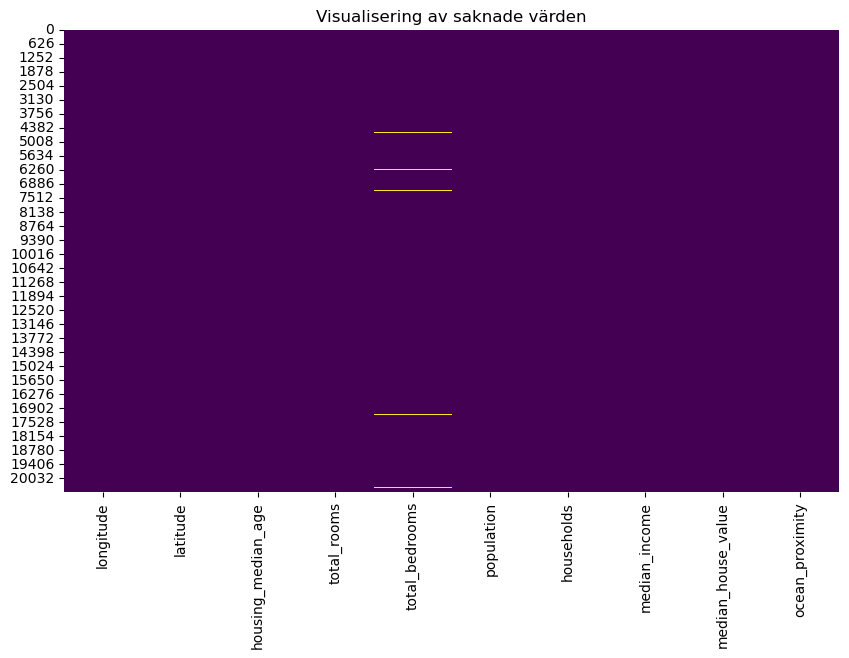

In [108]:
#Steg 2: Datautforskning och inspektion (Exploaring Data) 

#Kontrollera om det finns saknade värden
missing_values = housing_data.isnull().sum()
print("Saknade värden i varje kolumn:")
print(missing_values)

# Visualisera saknade värden
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
sns.heatmap(housing_data.isnull(), cbar=False, cmap ="viridis")
plt.title ("Visualisering av saknade värden")
plt.show()

**Förklaring**
Koden med funktion isnull() kontrollerar om det finns saknade värden i varje cell i datasetet.
sum() summerar antalet saknade värden (True-värden) för varje kolumn.
    
Utifrån svaret kan vi se att det finns 207 saknade värden på kolumn total_bedrooms, dvs. i den här kolumnen
har inte något värde, alltså det kan vara null eller tomt. De andra kolumnerna har fullständiga data, ingen saknade värden.

Grafen visualiserar de saknade värden, den lila bakgrunden indikerar fullständiga värden och de gula linjerna indikerar de
saknade värden i kolumnen total_bedrooms.

In [110]:
# Steg 3: Hantera de saknade värden 

# Ta bort rader med saknade värden
housing_data_cleaned = housing_data.dropna(subset=["total_bedrooms"])

# Kontrollera storleken på det nya datasetet
print("Antal rader efter att ha raderat saknade värden:", housing_data_cleaned.shape[0])

# Bekräfta att inga saknade värden finns kvar
print("Saknade värden efter rensning:")
print(housing_data_cleaned.isnull().sum())

Antal rader efter att ha raderat saknade värden: 20433
Saknade värden efter rensning:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


**Förklaring**
Eftersom antalet saknade värden är mycket liten andel av det totala databasetet (207/20640)*100 = 1%,
så valde jag att ta bort rader med de saknade värden. Att ta bort dessa rader påverkar inte resultaten signifikant. Om saknade värden var mycket större del av datasetet än 1%, hade vi en anledning för att behålla alla rader och välja en annan metod (som t.ex., fylla saknade värden med medelvärde eller median). 

Men för detta dataset, där endast 1% av värdena saknas, är den bästa lösningen att ta bort raderna med saknade värden.

Eftersom vi vet att saknade värden endast finns i kolumnen total_bedrooms, så använder jag funktionen 
dropna(subset = ["total_bedrooms"]) för att ta bort de saknade värden i den specifiken kolumnen. 
Man hade också kunnat använda endast dropna(), men den tar bort hela rader som har minst ett saknade värde (NaN) i någon av kolumnerna. 

Fördelar med att ta bort rader med saknade värden:
- denna lösning är enkel och säker eftersom den inte introducerar några antagande om de saknade värdena.
- Jag förlorar inte mycket data (endast 207 rader av 20640) vilket innebär att denna lösning inte kommer att påverka datasetet
övergripande analysresultat.
- Det finns inga risker för att införa felaktiga värden som kan påverka modeller eller analys.

Sedan gjorde jag en kontroll för att se antal rader finns i datasetet efter resning, vilket visar på ett totalt av 20433 rader, vilket bekräftar att 207 rader tagits bort. 

Jag kontrollerade även om det fanns kvar några saknade värden efter rensning med funktion isnull().sum(), vilket visade inga saknade värden. 

In [112]:
# Identifiera och hantera dubbletter
print(" Antalet Dubbletter i datasetet")
print(housing_data.duplicated().sum()) 

print("Antal kolumner med samma värden")
print(housing_data.nunique()) #Visar antalet unika värden per kolumn

 Antalet Dubbletter i datasetet
0
Antal kolumner med samma värden
longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64


**Förklaring**
Här har jag kollat om det fanns några dubbletter i datasetet, men det visade inga. Vilket betyder att varje rad i datasetet är unik
och det behövs inte ta bort några dubbletter. 

Jag kollade även antal unika värden per kolumn och resultatet visade att varje kolumn verkar ha unika värden.  

In [114]:
# Utforskning av värdefördelningar för numeriska kolumner
print("Värdefördelningar för Numeriska Kolumner")
print(housing_data.describe())  # Statistisk sammanfattning

print("Värdefördelingar för Kategoriska Kolumner")
print(housing_data["ocean_proximity"].value_counts())  # Antal värden per kategori

# Kontroll av datatyper 
print(housing_data.dtypes)

Värdefördelningar för Numeriska Kolumner
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.0000

**Förklaring:**
Värdefördelningar för numeriska kolumner visades i en form av tabell, t.ex. om vi tittar på kolumnerna longitude och latitude
ser vi att standaravvikelse (std) är litet, vilket tyder pa att data är begränsad till en viss region.

housing_median_age visar att median ålder för husen är 29 år (28,6...), den äldsta hus är 52 år och den yngsta är 1 år, 
variationen har en standardavvikelse på 12,6 år. 

På kolumnen total_rooms kan vi se att maxvärde ligger på 39320 vilket är ett ovanligt högt värde (det kan tyda på en outlier)
På total_bedrooms har maxvärde på 6445 vilket är också ett ovanligt högt värde. 

Kolumnen population har ett maxvärde på 35682 vilket är också extremt högt värde jämfört med medianen(1166). Det är tydligt indikation för outliers. Det samma händer med kolumnen householder, extremt högt maxvärde jämfört med medianen. 

Kolumnen media_income har ett snittvärde på 3,87 och ett maxvärde på 15 (också högt och kan indikerar en outlier)

Kolumnen media_house_value har ett maxvärde vid 500 001

För de kategoriska kolumnerna ser vi att de flesta hus ligger nära havet (<1hOcean:9136), Inland (6551 hus), 2658 nära havet men inte lika nära som (<1h ocean), 2290 nära en vik (near bay) och endast 5 hus i området (Island). 

Jag har också kollat på datatyper vilket visade att alla numeriska kolumner har rätt datatyp (float64) och kolumnen ocean_proximity vilken är en kategorisk kolumn är korrekt klassificerad som "object"(kategorisk data).


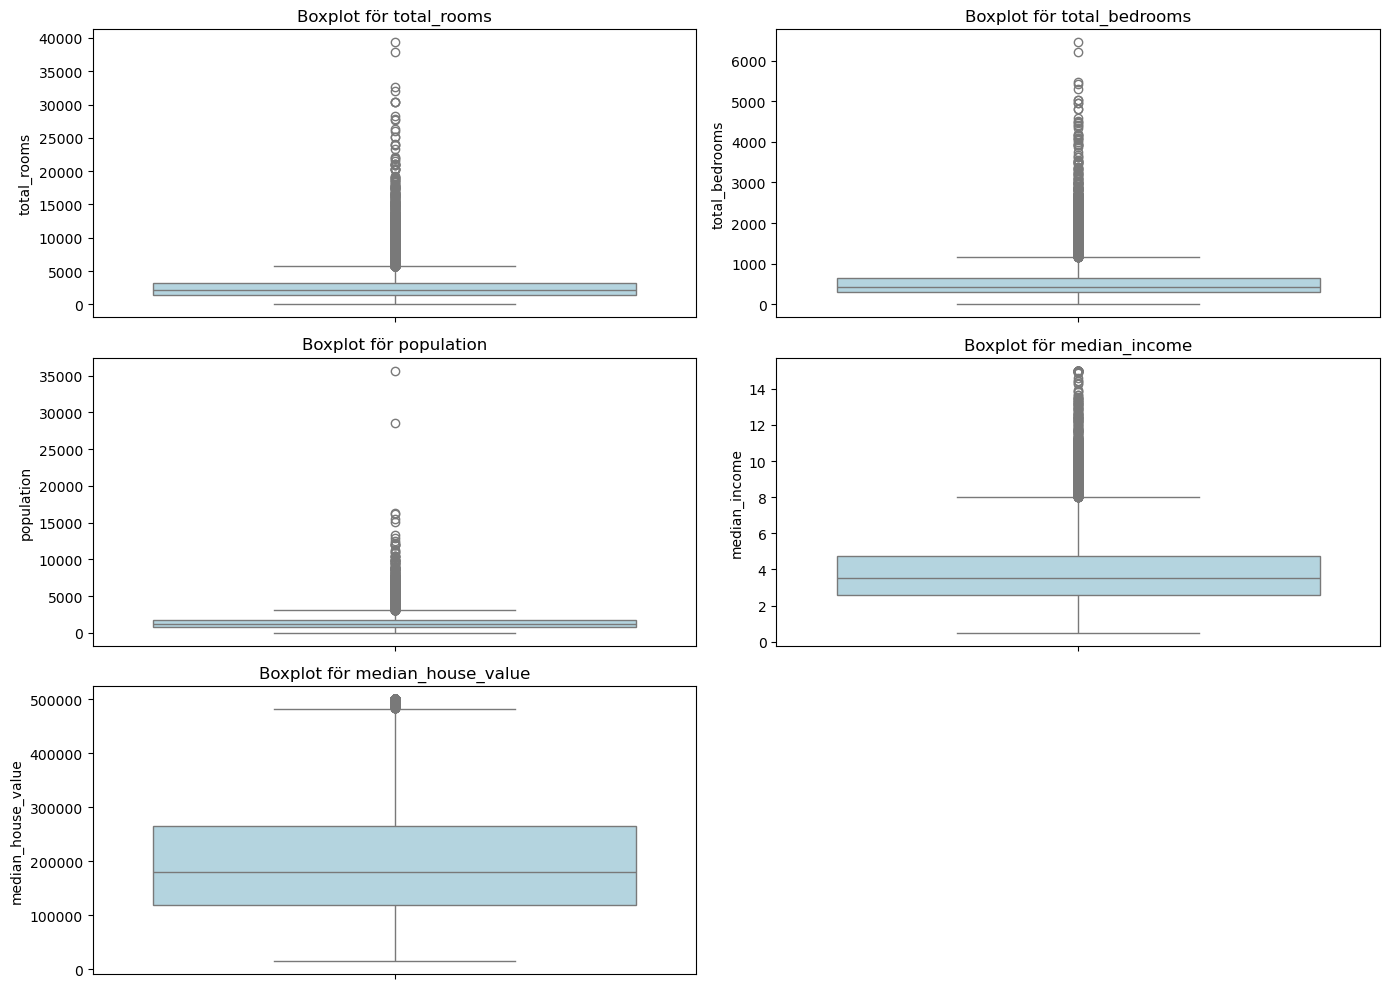

In [116]:
# Steg 1: Visualisera outliers för numeriska kolumner
numerical_columns = ['total_rooms', 'total_bedrooms', 'population', 'median_income', 'median_house_value']
plt.figure(figsize=(14, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=housing_data, y=column, color='lightblue')
    plt.title(f'Boxplot för {column}', fontsize=12)
    plt.ylabel(column, fontsize=10)

plt.tight_layout()
plt.show()

**Förklaring:**
Utifrån boxplotarna ovanför kan vi se fördelningen för varje numerisk kolumn. Mittlinjen i varje box representerar medianvärdet för varje kolumn. En bredd box indikerar stor variationen av 50% av data medan en smal box indikerar att värdena är mer koncentrerade, närmare till medianen.

Outliers är de små punkterna som ligger utanför extremvärden, borta från de övriga värden. 

T.ex. Boxploten för kolumnen total_bedrooms har flera punkter som ligger över 1000 sovrum. Boxploten för kolumnen 
total_bedrooms har också flera värden 20 000 rum, vilket är också ovanlit att ha så stora byggnader. Dessa kolumner har extrema höga värden och det kan tyda på att vissa områden har ovanligt stora hus eller fastigheter.

Kolumnen population har värden nära 30 000 och 35 000. Här kan outliers indikerar att vissa områden har större befolkning änd de flesta andra områden. 

Boxploten för kolumnen median_income visar outliers över 8 vilket är mycket högre än medelvärdet. 
Boxploten för median_house_value visar värden som går upp till 500 000 vilket är också mycket högre än de flesta andra husvärden. Husvärden för de flesta ligger mellan 100 000 och 400 000. 


In [154]:
# Steg 2: Göra statistiska tester för Outliers med IQR-metoden för att se om dessa värden kan verkligen betraktas som outliers

# Beräkna kvartiler
Q1 = housing_data[numerical_columns].quantile(0.25)
Q3 = housing_data[numerical_columns].quantile(0.75)

# Beräkna IQR
IQR = Q3 - Q1

# Beräkna outliergränser
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifiera outliers
outliers = (housing_data[numerical_columns] < lower_bound) | (housing_data[numerical_columns] > upper_bound)

# Visa resultatet
outliers_summary = outliers.sum()
print("Antal outliers per kolumn:")
print(outliers_summary)

Antal outliers per kolumn:
total_rooms           1287
total_bedrooms        1271
population            1196
median_income          681
median_house_value    1071
dtype: int64


**Förklaring:**
Eftersom jag inte har kunskap om områdena, blir det svårt att veta om dessa outliers är verkliga värden eller om 
det gäller om fel inmatning. 

För att fortsätta med analysen gör jag en statistisk test med IQR-metoden för att dubbelkolla att dessa värden kan betraktas som outliers.
IQR (Interquartile Range) metod beräknar värden som ligger utanför intervallet Q1 -( 1.5 x IQR) till Q3 + (1.5 x IQR) där
Q1 är den första kvartilen och Q3 den tredje kvartilen. Om det finns ett värde utanför intervallet så kan värdet betraktas som outliers.

Svaret för koden visade att total_rooms har 1287 outliers, dvs. 1287 rader där antalet rum är mycket högre än det normalla intervallet.
På samma sätt ser vi att de andra kolumnerna har också många outliers. 


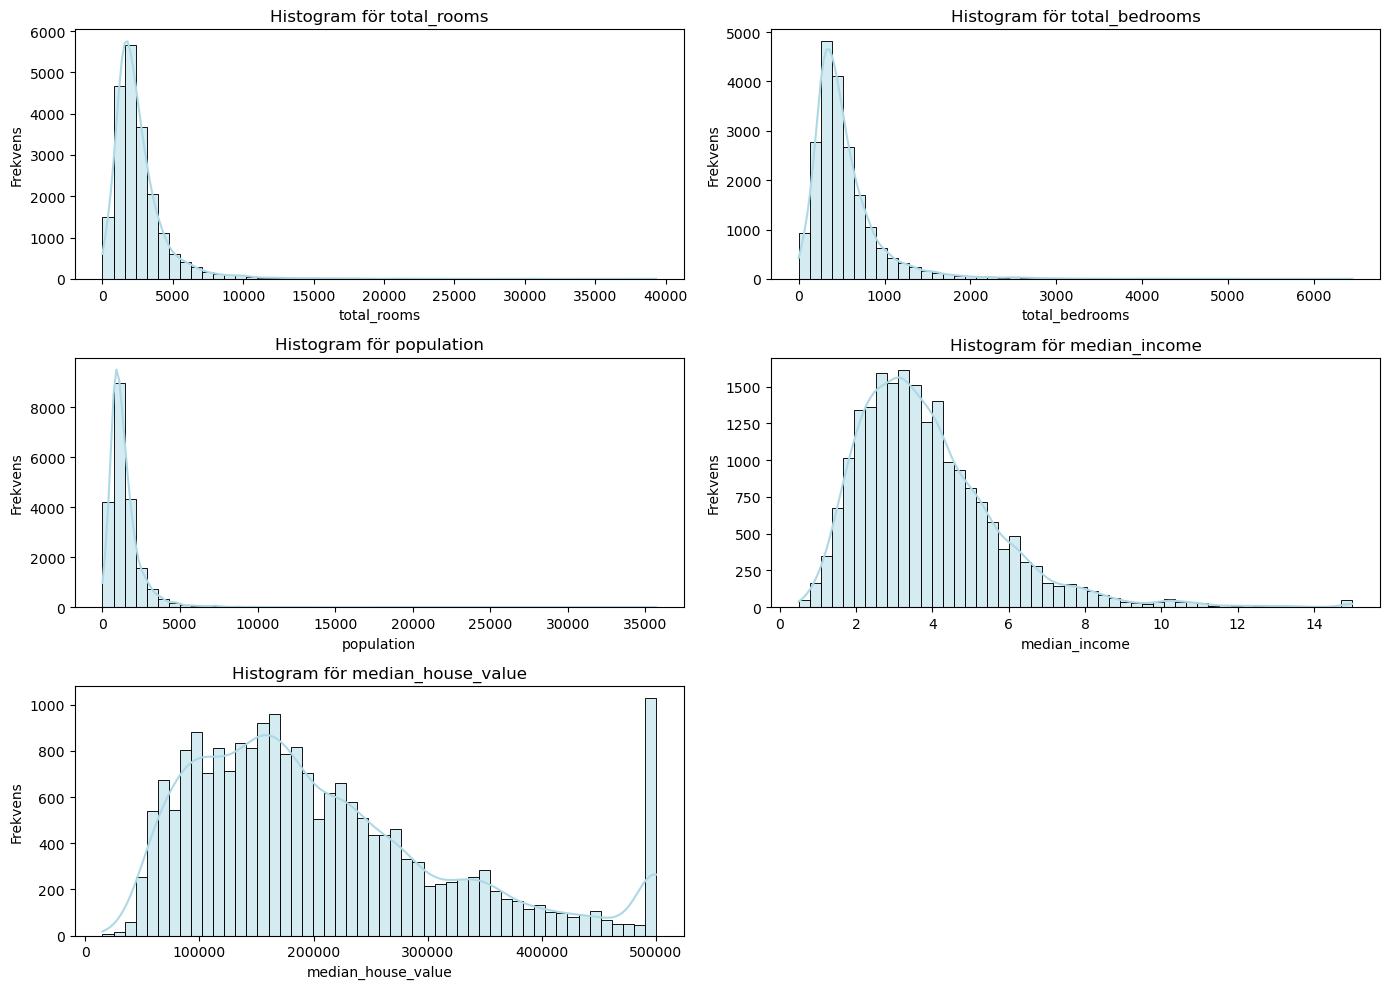

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

# Skapa histogram för varje numerisk kolumn
numerical_columns = ['total_rooms', 'total_bedrooms', 'population', 'median_income', 'median_house_value']

plt.figure(figsize=(14, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(housing_data[column], kde=True, color='lightblue', bins=50)  # sns.histplot skapar histogrammet för varje kolumn, KDE för smidig kurva
    plt.title(f'Histogram för {column}')
    plt.xlabel(column)
    plt.ylabel('Frekvens')

plt.tight_layout()
plt.show()

**Förklaring:**
koden ovanför undersöker fördelningen av data för varje variabel (varje kolumn)
sns.histplot är en funktion som skapa histogrammet för varje kolumn
kde=Tre lägger en kurva över histogrammet för att undelätta att se fördelningen
bins=50 sätter antalet staplar i histogrammet

T.ex. histogrammet för total_room visar en lång svans av värden efter 5 000 och sträcker sig över till 40 000; för total_bedrooms är 
de flesta värden närmare till 0 och en lång svans med värden över 1000. 

Alltså, vi kan se tydligt i alla histogram att flera kolumner har outliers särskillt total_rooms, total_bedrooms, population oc median_house_value. 

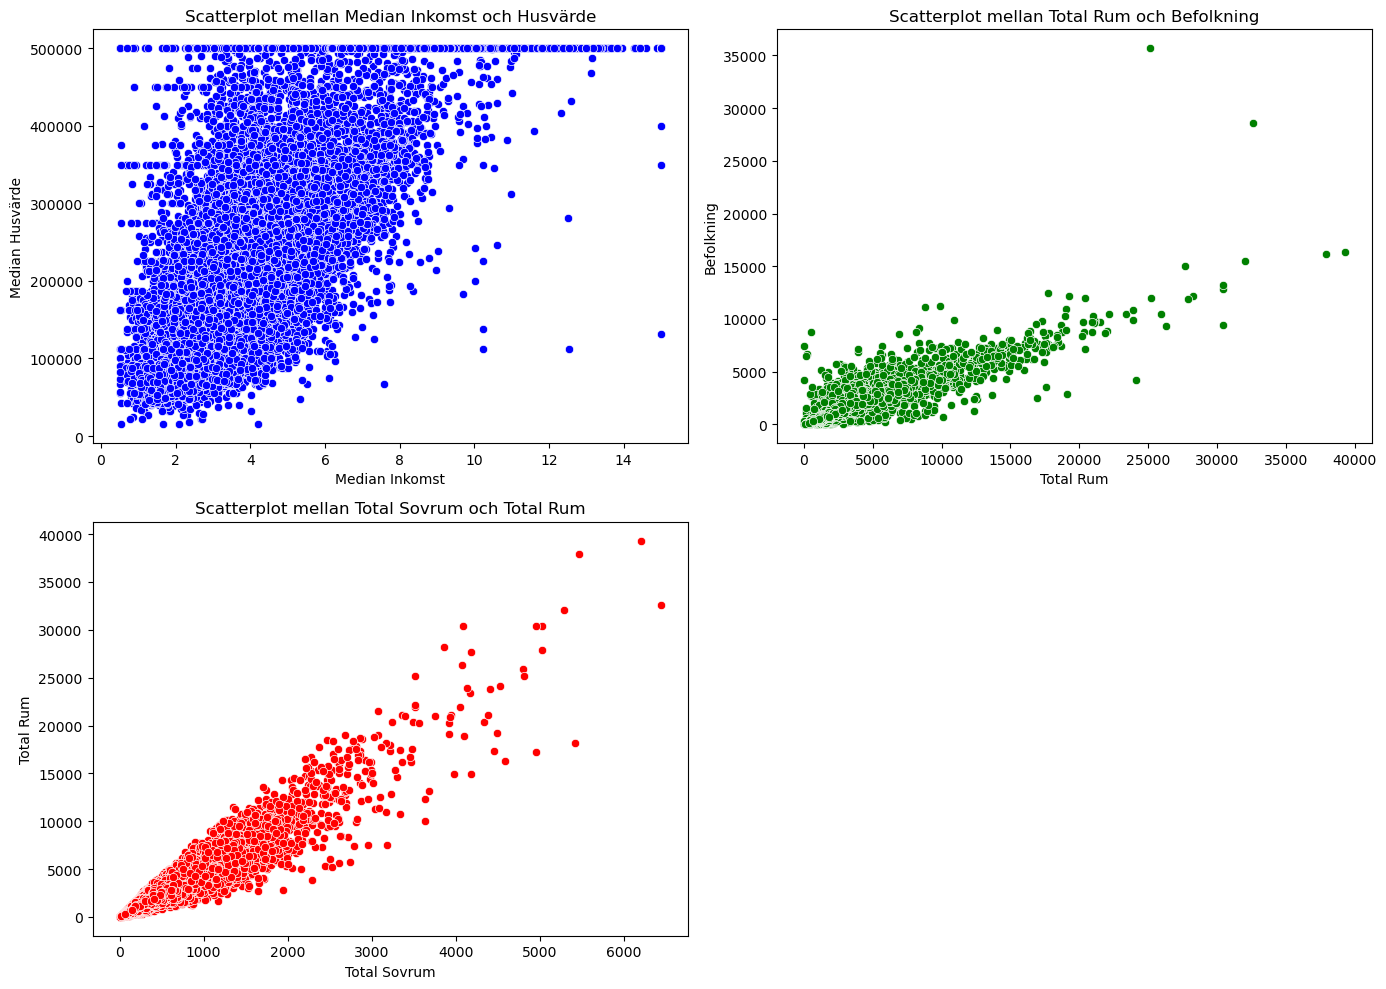

In [122]:
# Skapa scatter plots för att undersöka sambanden mellan olika kolumner
plt.figure(figsize=(14, 10))

# Scatter plot mellan 'median_income' och 'median_house_value'
plt.subplot(2, 2, 1)
sns.scatterplot(x=housing_data['median_income'], y=housing_data['median_house_value'], color='blue')
plt.title('Scatterplot mellan Median Inkomst och Husvärde')
plt.xlabel('Median Inkomst')
plt.ylabel('Median Husvärde')

# Scatter plot mellan 'total_rooms' och 'population'
plt.subplot(2, 2, 2)
sns.scatterplot(x=housing_data['total_rooms'], y=housing_data['population'], color='green')
plt.title('Scatterplot mellan Total Rum och Befolkning')
plt.xlabel('Total Rum')
plt.ylabel('Befolkning')

# Scatter plot mellan 'total_bedrooms' och 'total_rooms'
plt.subplot(2, 2, 3)
sns.scatterplot(x=housing_data['total_bedrooms'], y=housing_data['total_rooms'], color='red')
plt.title('Scatterplot mellan Total Sovrum och Total Rum')
plt.xlabel('Total Sovrum')
plt.ylabel('Total Rum')

plt.tight_layout()
plt.show()


**Förklaring**
Funktionen sns.scatter skapar scatter plots som visar samband mellan två variabler.
Den första blå ploten visar sambandet mellan median_house_values och median_income. 
Den gröna ploten visar sambandet mellan population och total_room. 
Den röda ploten visar sambandet mellan total_room och total_bedrooms.

Alla dessa scatterplots visade på förväntade samband. T.ex, högre inkomster leder till högre husvärde, fler rum är kopplade till 
större befolkning. 

Vi kan också se de outliers (de höga extrema värden) som ligger borta från de flesta värden.

Ett sätt att hantera dessa outliers är att ta bort de från datasetet om de inte är riktika värden och stör analysen. 
I det här fallet väljer att tro att alla värden är trovärdiga och rätt inmatade, och behåller dessa outliers.


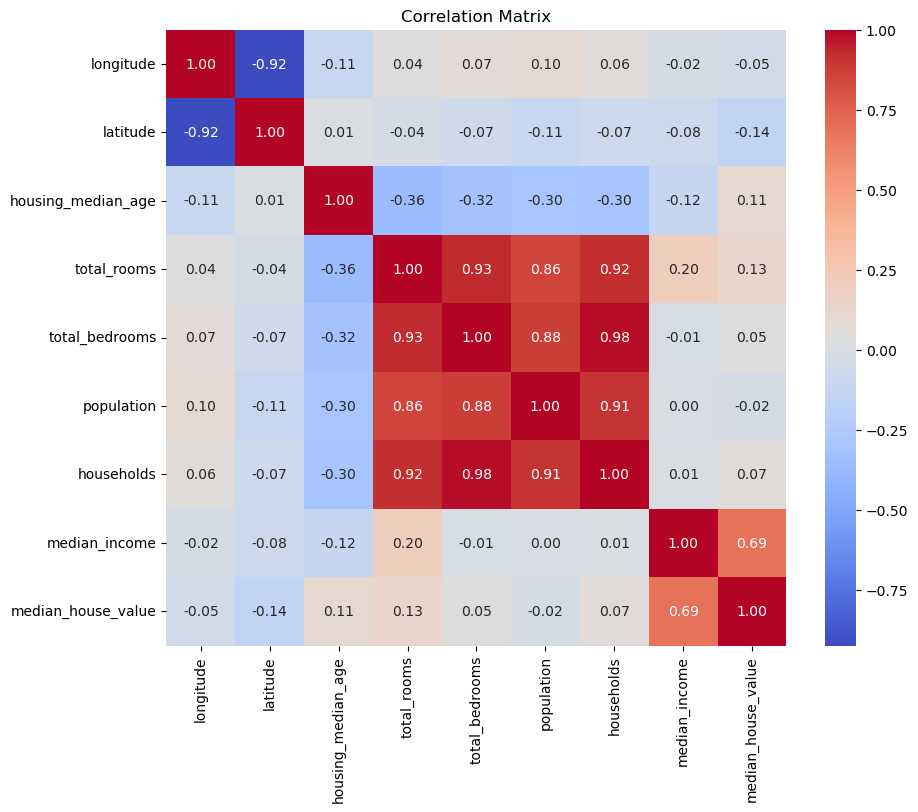

In [96]:
#Correlation Matrix (lösningen utan kolumn 'ocean_proximity' som har string värde) 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_data = housing_data.select_dtypes(include = [float, int])

# Count Correlation (beräkna korrelationen)
correlation_matrix = numerical_data.corr()

# Plot a heatmap of correlations between numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


**Förklarin av Korrelationsmatris**

En korrelationsmatris visar hur starkt olika variabler (kolumner) i datasetet är relaterade till varandra. 
Värdena i matrisen varierar mellan -1 och +1, där:

+1 indikerar en perfekt positiv korrelation (när en variabel ökar, ökar även den andra variabeln i samma takt).
-1 indikerar en perfekt negativ korrelation (när en variabel ökar, minskar den andra).
0 indikerar ingen korrelation (de två variablerna är oberoende av varandra).

kolumnerna som visade ha starka positiva korrelationer: 

total_rooms och total_bedrooms (0,92) - Det finns en stark positiv korrelation mellan antalet rum och antalet sovrum. Vilket innebär att huset med fler rum tenderar ha flera sovrum

population och households (0,91) - Det finns en stark positiv korrelation mellan dessa två kolumner. 

total_rooms och households (0,97) - Det finns en mycket stark positiv korrelation mellan dessa två kolumner. Hus med fler rum tenderar 
ha fler hushåll. 

median_house_value och median_income (0,69) - Det finns en positiv korrelation mellan dessa två kolumner, vilket innebär att
området med högre inkomster tenderar att ha högre husvärden. 

- Starka negativa korrelationer:
  - longitude och latitude (-0,92)
  - housing_median_age och total_rooms (-0,36)
  - housing_median_age och total_bedrooms (-0,32)

- Svaga eller inga korrelationer:

  - median_house_value och longitude (-0,05)
  - median_house_value och house_median_age (0,11)


    Sammanfattning:
    Vissa variabler som antalet rum och sovrum är starkt kopplade till varandra, såssom variabler som befolkning och hushåll har nära relation.(Positiv korrelation)
    Geografiska koordinater, longitude och latitude verkade ha en invers relation.(Negativ korrelation)
    Vissa variabler som medianhusvärde och medelålder på hus verkade inte vara beroende av varandra. (svaga korrelation)
    

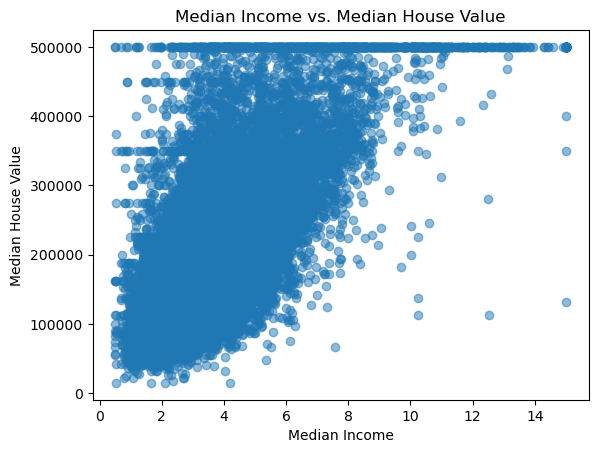

In [124]:
import matplotlib.pyplot as plt
import numpy as np

#Scatter plot of median_income vs. median_house_value:

plt.scatter(housing_data['median_income'], housing_data['median_house_value'], alpha=0.5)
plt.title('Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()


**Förklaring för plotten ovanför**
Graffen visar en scatter plot (spridningsdiagram) som visar förhållandet mellan data från median_income och median_house_value

X-axeln representerar Median Income, vilket visar värden från 0 till 15
Y-axel representerar Median House Value, det visar värden från 0 till 500 000

1) Figuren visar tätta punkter vid låg "median income", och det verkar som att det finns hus som ligger runt 100 000.

2) Figuren visar större spridning vid högre "median income", det betyder att huset värde sprider sig mot högre värde när median income ökar

3) Figuren visar att några av de högsta husvärden ligger nära 500 000 vilket är kopplat till högra värdena på median income

4) Figuren visar en aglomeration av punkterna nära botten på y-axel och till vänster på x-axeln, vilket tyder på
att de flesta hus i datasetet har både låga median house value och median income.


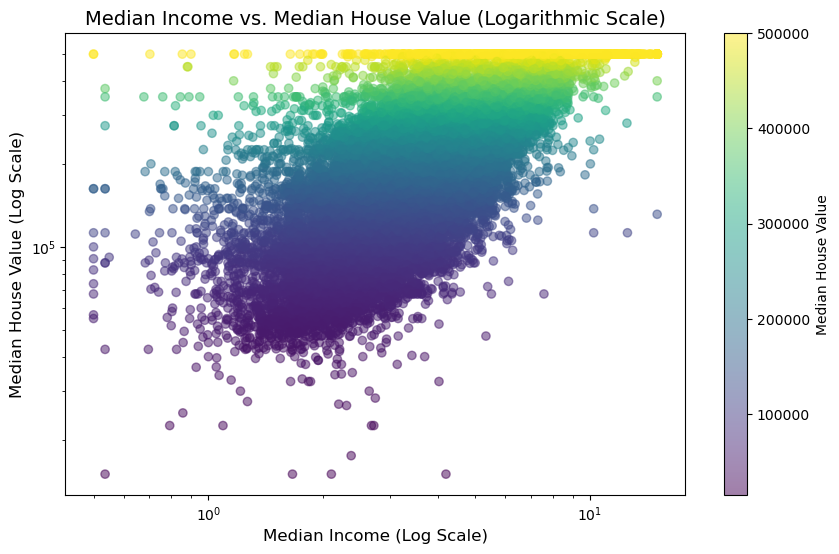

In [126]:
# En förbättrad version av tidigare koden: För att förbättra läsbarhet har en logaritmisk skala för både
# x och y används. Med logaritmisk skala kan vi bättre visualisera förhållandet mellan inkomster och husvärden.

import matplotlib.pyplot as plt
import numpy as np

# Scatter plot: Median Income vs. Median House Value
plt.figure(figsize=(10, 6))

# Logaritmisk skala på både x- och y-axeln används
plt.scatter(housing_data['median_income'], housing_data['median_house_value'], alpha=0.5, c=housing_data['median_house_value'], cmap='viridis')

# Logaritmisk skala har lagts till 
plt.xscale('log')
plt.yscale('log')

# Lägg till titel och etiketter i grafen
plt.title('Median Income vs. Median House Value (Logarithmic Scale)', fontsize=14)
plt.xlabel('Median Income (Log Scale)', fontsize=12)
plt.ylabel('Median House Value (Log Scale)', fontsize=12)

# Färger för att markera olika områden används med funktion (colorbar) för husvärde
plt.colorbar(label='Median House Value')

# Visa grafen
plt.show()

**Förklaring:**
Logaritimisk skala har använts för att förbättra visualiseringen av data med stora variationer. 
därför både x-axeln och y-axeln funktioner plt.xscale('log') och plt.yscale('log')

c=housing_data['median_house_value'] använts för att färglägga punkterna baserat på deras husvärde. 
cmap='viridis' är en typ av färgkarta, andra färgerna som kan används är t.ex. 'plasma', 'coolwarm', osv. 

funktionen plt.colobar() lägger färgskalan tydligt så att man kan lätt se vad den representerar av Median House Value. 
I den grafen ser man det tydligare att husvärde ökar (går mot den gula färgen) när median inkomster ökar.

In [146]:
#Exploratory Analys:

# Hitta den dyraste hus ** använd funktion max() för att hitta det dyraste hus
most_expensive = housing_data[housing_data['median_house_value'] == housing_data['median_house_value'].max()]
print(most_expensive)

# Hitta den billigaste hus ** Här används funktion min() för att hitta huset som är billigast
cheapest = housing_data[housing_data['median_house_value'] == housing_data['median_house_value'].min()]
print(cheapest)


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
89       -122.27     37.80                52.0        249.0            78.0   
459      -122.25     37.87                52.0        609.0           236.0   
493      -122.24     37.86                52.0       1668.0           225.0   
494      -122.24     37.85                52.0       3726.0           474.0   
509      -122.23     37.83                52.0       2990.0           379.0   
...          ...       ...                 ...          ...             ...   
20422    -118.90     34.14                35.0       1503.0           263.0   
20426    -118.69     34.18                11.0       1177.0           138.0   
20427    -118.80     34.19                 4.0      15572.0          2222.0   
20436    -118.69     34.21                10.0       3663.0           409.0   
20443    -118.85     34.27                50.0        187.0            33.0   

       population  households  median_income  media

**Förklaring av resultatet ovanför**

Koden skrev ut på de mest och minst kostsamma husen i dataset. Koden visar detaljer om både det dyraste huset
och det billigaste huset i form av deras attibuter som longitude, latitude, housing_median_age, total_rooms, etc.

1) det dyraste huset visade har ett värde på 500 001 . Det verkar som de dyraste husen har gemensamma egenskaper som stor yta (fler rum ) samt hög median inkomst och hög befolkning. 
2) de billigaste husen har ett värde på 14 999 . De tenderar ha mindre yta (färre antal rum) och lägre median inkomst. 
   

In [148]:
# Eftersom de dyraste och billigaste husen har identifierats, kan vi analysera vidare genom att jämföra
# vissa egenskaper som husvärde, median inkomst, antalet rum för de dyra respektive billiga husen.

# Dyraste hus
most_expensive = housing_data[housing_data['median_house_value'] == housing_data['median_house_value'].max()]

# Billigaste hus
cheapest = housing_data[housing_data['median_house_value'] == housing_data['median_house_value'].min()]

# Jämför median husvärde, medianinkomst och antal rum
most_expensive_summary = most_expensive[['median_house_value', 'median_income', 'total_rooms']]
cheapest_summary = cheapest[['median_house_value', 'median_income', 'total_rooms']]

print("Most Expensive Houses Summary:")
print(most_expensive_summary.describe())

print("\nCheapest Houses Summary:")
print(cheapest_summary.describe())


Most Expensive Houses Summary:
       median_house_value  median_income   total_rooms
count               965.0     965.000000    965.000000
mean             500001.0       7.825123   2961.968912
std                   0.0       3.245021   2162.502126
min              500001.0       0.499900      8.000000
25%              500001.0       5.239100   1668.000000
50%              500001.0       7.719700   2518.000000
75%              500001.0      10.112200   3542.000000
max              500001.0      15.000100  18132.000000

Cheapest Houses Summary:
       median_house_value  median_income  total_rooms
count                 4.0       4.000000     4.000000
mean              14999.0       2.122475   443.750000
std                   0.0       1.529547   324.007587
min               14999.0       0.536000    98.000000
25%               14999.0       1.379525   215.750000
50%               14999.0       1.880350   437.000000
75%               14999.0       2.623300   665.000000
max             

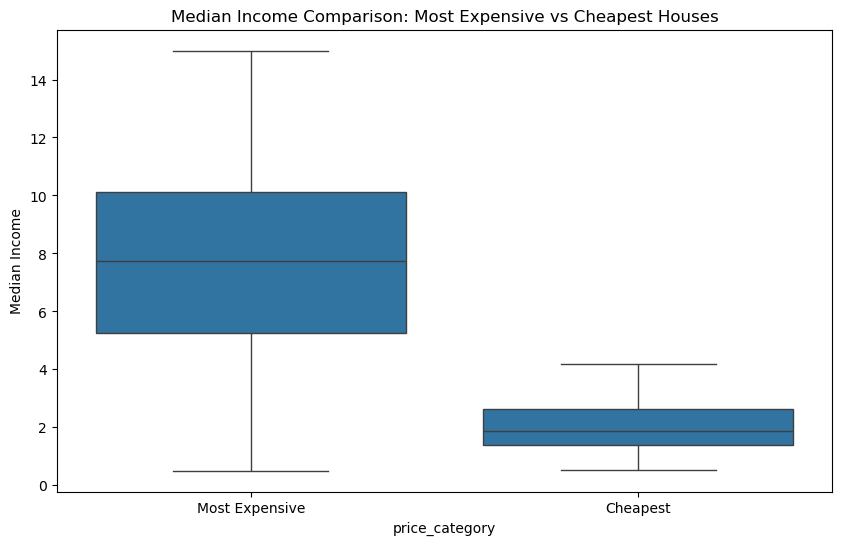

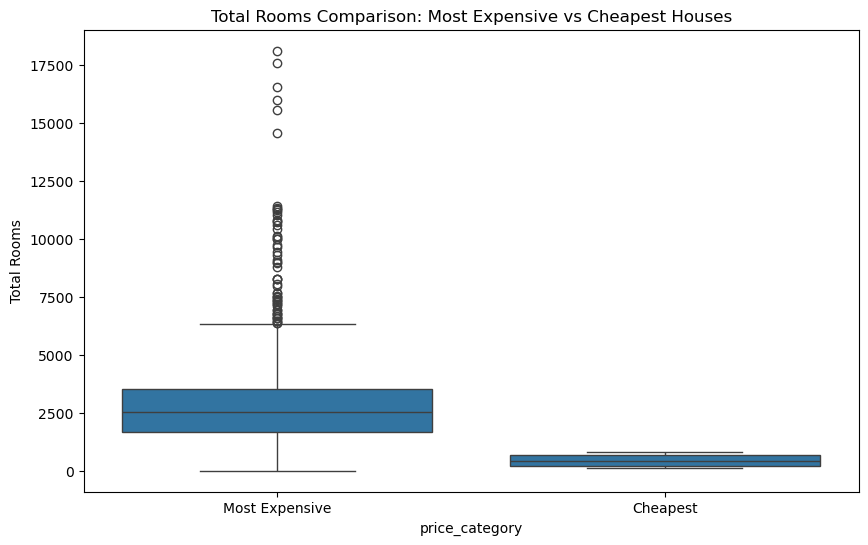

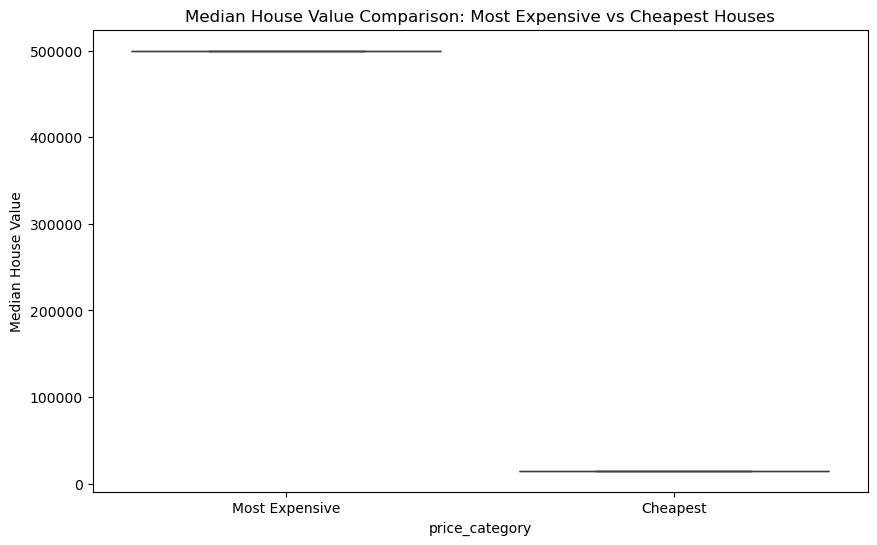

In [150]:
# Visualisera skillnader mellan de dyraste och billigaste husen:

import seaborn as sns
import matplotlib.pyplot as plt

# Lägg till en kolumn som markerar om huset är dyrt eller billigt
housing_data['price_category'] = housing_data['median_house_value'].apply(
    lambda x: 'Most Expensive' if x == housing_data['median_house_value'].max() else ('Cheapest' if x == housing_data['median_house_value'].min() else 'Other')
)

# Visualisera skillnader i medianinkomst mellan dyraste och billigaste husen
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_category', y='median_income', data=housing_data[housing_data['price_category'].isin(['Most Expensive', 'Cheapest'])])
plt.title('Median Income Comparison: Most Expensive vs Cheapest Houses')
plt.ylabel('Median Income')
plt.show()

# Visualisera skillnader i antal rum mellan dyraste och billigaste husen
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_category', y='total_rooms', data=housing_data[housing_data['price_category'].isin(['Most Expensive', 'Cheapest'])])
plt.title('Total Rooms Comparison: Most Expensive vs Cheapest Houses')
plt.ylabel('Total Rooms')
plt.show()

# Visualisera skillnader i husvärde mellan dyraste och billigaste husen
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_category', y='median_house_value', data=housing_data[housing_data['price_category'].isin(['Most Expensive', 'Cheapest'])])
plt.title('Median House Value Comparison: Most Expensive vs Cheapest Houses')
plt.ylabel('Median House Value')
plt.show()


**FÖRKLARING KODEN OVANFÖR:** Funktionen apply() och lambda användes för att skapa en kolumn där skulle markeras om 
ett hus är det dyraste eller billigaste baserat på 'median_house_value. Sedan data filtreras för att bara visa de
dyraste och billigaste husen för varje visualisering. 

Boxplots skapades för att jämföra median inkomst med antal rum och husvärde för de dyraste och billigaste husen.

Den första boxplots visar a "Median Income" för de dyraste hus har en större box, och medianen ligger nära den
den högre delen av skalan. Inkomsterna för denna grupp varierar mer (stor spridning), och de dyraste hus ligger 
i områden där man har högre "Median income". 

För de billigaste husen är box mycket mindre med lite spridning, vilket tyder på att inkomsterna för de billigaste
hus ligger inom ett smalare intervall, och median inkomst är låg. 

Sammanfattningsvis kan vi säga att de dyraste husen finns i områden med mycket högre median inkomster jämfört med de billigaste husen.

Den andra grafen med boxplots jämförar total rum gentemot de dyraste och billigaste husen.  Grafen visar att
det skiljer sig mycket i antal rum för de dyraste husen (det finns en del hus med fler rum än 5000). De flesta hus har mellan 2500 och 3500 rum, vilket indikerar att husen är mycket stora.

Boxen för de billigaste husen är smalare och de flesta hus har ett litet antal rum. 

Den sista boxen visar jämförelse av median_house_value gentemot de billigaste och dyraste hus. Vi kan se att 
de dyraste husen har ett husvärde på 500 000 eller mer. De billigaste husen har ett husvärde på 14 999, det finns
inget hus med ett högre värde. Boxen för billigaste husen är centrerad nära 15 000. Här kan vi sammanfatta att
de dyraste husen har ett fast värde medan de billigaste husen ligger på ett mycket lägre värde. 


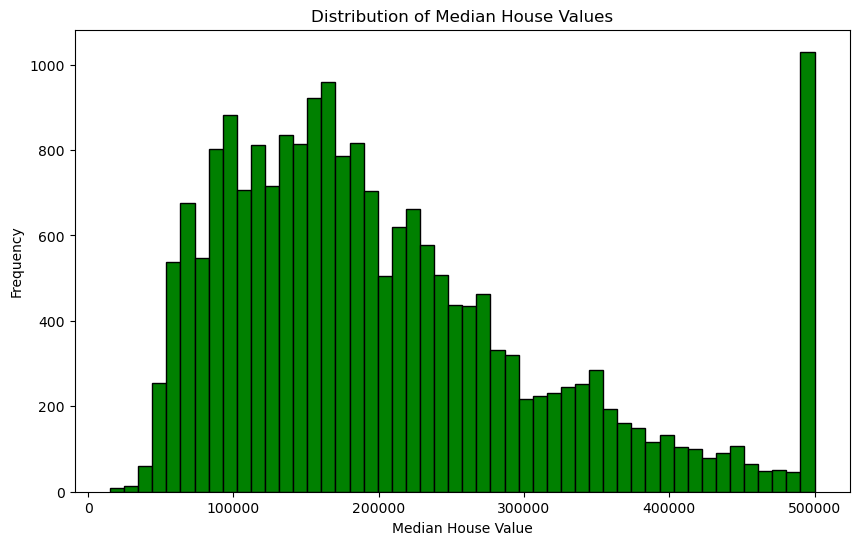

In [140]:
#För att bättre förstå hur husvärdena är fördelade, kan vi ta fram ett histogram för alla husvärden

# Plot histogram for all house prices
plt.figure(figsize=(10, 6))
plt.hist(housing_data['median_house_value'], bins=50, color='green', edgecolor='black')
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

**FÖRKLARING**
Med histogramplot kan vi bättre se hur datasetet fördelades. Det är lätt att avläsa sådan grafen. 
x-axeln visar  husvärdet som går från till 500 000 . y-axel visar frekvensen, antalet hus inom varje intervall.
Ju högre staplar på y-axeln desto fler hus ligger i det specifika intervallet för husvärde.

Större del av husen har ett värde mellan 100 000 och 200 000, de flesta husvärden verkar vara koncentrerade mellan 
dessa två värd.

Det finns en mycket hög stapel med 500 000, vilket betyder att det är stort antal hus i dataset med husvärde 
exakt på 500 000. Det visar också att det är ett gränsvärde i datasetet, det finns inget hus som är värt mer än
500 000.

**Kontrollskunskap Utvärdering:**

**1) Har något varit utmanande i kunskapskontrollen? Om ja, hur har du hanterat det?**
   
Några uppgifter har varit utmanande, särskillt när jag inte visste exakt hur jag skulle skriva koden eller vilken funktion som skulle användas. 

Jag stötte på många upprepade fel och fick skriva om och testa koden flera gånger innan den blev rätt.

För att lösa detta letade jag efter information om de olika bibliotek som har använts, som NumPy (genom länkarna du foreslog),
Seaborn, SciPy osv. 

När jag stötte på funktioner jag inte visste hur jag skulle skriva, googlade jag och använde även ChatGPT för att ställa frågor, till exempel när jag skulle sortera data och hantera saknade värden på datasetet. En funktion jag lärde mig var .isnull().sum() 


**2)Vilket betyg anser du att du ska ha och varför?**

Jag anser att jag uppfyller alla krav för betyget VG i mina lösningar. 

Jag har arbetat med Python för att lösa olika problem som matris- och vektorberäkningar, analyserat och visualiserat data med olika typer av grafer och hanterat data genom EDA(exploratory data analysis). Jag har lärt mig om datahantering och visualisering med scatter plots, histogram, boxplots och korrelationsmatris. 

När jag stötte på fel i koden, genomförde jag felsökning och förbättringar. Till exempel, vid kontrollskunskap 3, när jag skulle hantera saknade värden, fick jag fel på grund av kolumnnamnen. För att lösa detta printa jag ut kolumnnamnen för att kunna skriva koden med de rätta kolumnnamnen. Andra förbättringar jag genomförde under kodskrivning var färgsättning i scatter plots och boxplots för att förbättra läsbarheten. 

Sammanfatningsviss har jag tagit eget ansvar för arbetsflödet och genomfört uppgifterna med skicklighet både kontrollskunskap 2 och kunskapskontroll 3. Jag har jobbat med strukturering av lösningarna där både visualisering och förklaringar är dokumenterat. Jag har även gjort förbättringar för att effektivisera koden och arbetsflödet, vilket är ett viktigt krav för VG.


**3)Något du vill lyfta fram till Antonio?**

Vissa uppgifter var mer utmanande än andra, men jag tycker att det är bra att ha uppgifter där vi inte vet exakt hur man löser dem.

Det är en del av lärandet att ta reda på information, söka på lösningar och testa sig fram. Jag hade läst Python på
universitet när tog min civilingenjörutbildning, men jag kan ändå inte säga att jag riktigt lärde mig Python då. Allt handlar om att testa, och genom att ta sig utmanande uppgifter för att lära sig verkligen. 

Jag gillade den sista uppgiften (kontrollskunskap 3) där jag fick en praktisk uppgift om hantering av stora datamängder med Python. Jag är intresserad av yrke Dataanalytiker och planera att läsa en masterutbildning inom området. Så det var kul för mig. Denna uppgift kan man jobba ännu mer, t.ex. man kan hantera outliers, kan skapa modellen före och efter outliershanteringen och jämföra vilken modell presterar bättre. Det går att fördjupa mer i analysen. Jag valde att inte göra dessa steg för att lösningen skulle bli väldigt stor. 

En annan utmaning för mig var att hantera git och github för att lämna in uppgifter. Det tog ett tag innan jag lyckades med detta på min Mac. Först fick jag problemet med autentisering, och fick skapa en personal token. 